2024-09-04 09:36:48.019731: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-04 09:36:48.031398: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-04 09:36:48.124493: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-04 09:36:48.222531: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-04 09:36:48.299838: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

250
496


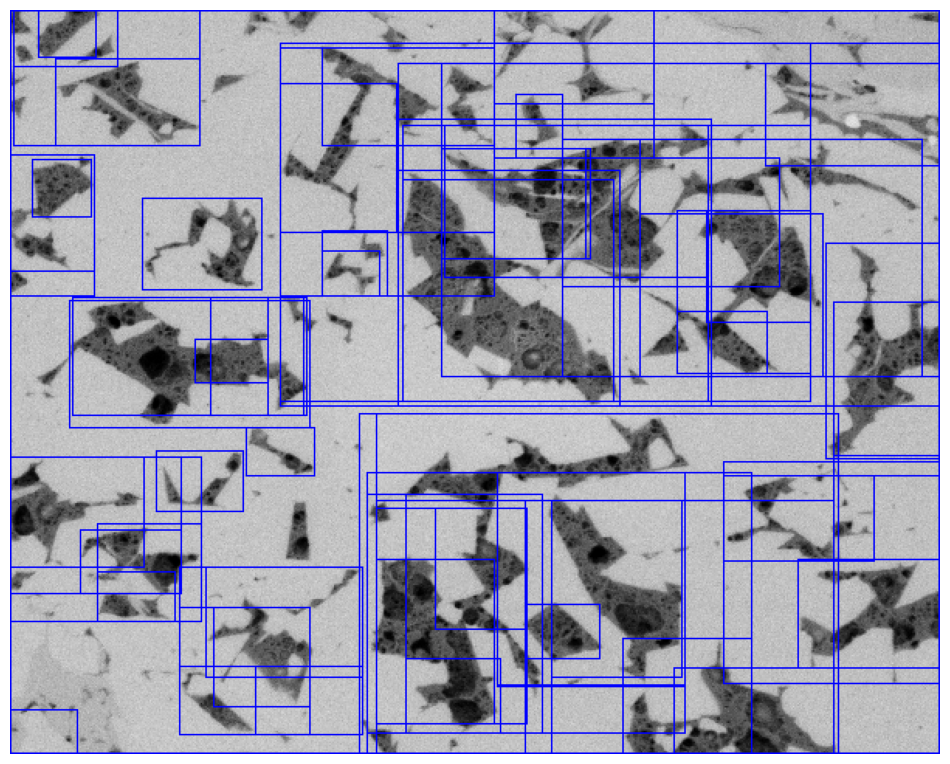

In [1]:
%matplotlib inline
from keras.preprocessing import image
import skimage.data
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import selectivesearch
import numpy as np
import cv2
 
# 加载图片数据
#img = skimage.data.checkerboard() 
img_path = "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/Image1-001.jpg"
img = image.load_img(img_path, target_size=(480, 600))#(h,w)
img = image.img_to_array(img)
img=img.astype('uint8')
 
img_lbl, regions = selectivesearch.selective_search(img, scale=500, sigma=0.9, min_size=20)
 
#计算一共分割了多少个原始候选区域
temp = set()
for i in range(img_lbl.shape[0]):
    for j in range(img_lbl.shape[1]):    
        temp.add(img_lbl[i,j,3]) 
print(len(temp))
 
print(len(regions))#计算利用Selective Search算法得到了多少个候选区域
 
#创建一个集合 元素list(左上角x，左上角y,宽,高)
candidates = set()
for r in regions:
    if r['rect'] in candidates:#排除重复的候选区
        continue
    if r['size'] < 500:#排除小于 2000 pixels的候选区域(并不是bounding box中的区域大小)  
        continue
    x, y, w, h = r['rect']
    if w / h > 2 or h / w > 2: #排除扭曲的候选区域边框  即只保留近似正方形的
        continue
    candidates.add(r['rect'])
    
for x, y, w, h in candidates:
    #print(x, y, w, h)
    cv2.rectangle(img, (x, y), ( x+w,y+h), (0, 0, 255), 1) 
    
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')
plt.savefig('ss.png')
plt.show()
